In [1]:
# Execute this to get wide display
from IPython.display import display, HTML
display(HTML("""<style>#notebook-container{width:100%;margin:20px;padding:20px}</style>"""))

In [10]:
from text_characterization.analysis import (
    show_pairwise_metric_correlations,
    PredictFromCharacteristicsAnalysis,
)
from text_characterization.utils import load_text_metrics
import text_characterization
from pathlib import Path

DC_HOME_DIR=Path(text_characterization.__file__).parent.parent.absolute()


In [11]:
import pandas as pd

# Loading the Feature Data

First, see the README.md on how to generate the data needed to run this analysis

In [12]:
from datasets import load_dataset

metrics_df = load_text_metrics(f"{DC_HOME_DIR}/examples/translation/data/translation_text_characteristics.tsv")


Dropping column DESPLd! It contains 100.00% (>20.00%) NaN values!
Dropping column DESSLd! It contains 58.10% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_WRDAOAc! It contains 58.71% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_WRDFAMc! It contains 50.95% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_WRDCNCc! It contains 51.26% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_WRDIMGc! It contains 50.95% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_WRDMEAc! It contains 52.37% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_WRDHYPn! It contains 52.33% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_WRDHYPv! It contains 53.97% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_WRDHYPnv! It contains 50.53% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_AOA! It contains 80.40% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_AOA_MAX! It contains 80.40% (>20.00%) NaN values!
Dropping column WORD_PROPERTY_CONCRETENESS! It contains 49.69% (>20.00%)

## Now we can augmnet this with some topic-specific information from the dataset

In [13]:
data = load_dataset("breakend/nllb-multi-domain", "eng_Latn-rus_Cyrl", split="valid")
topics = data["domain"]

final_topics = []

for i, row in metrics_df.iterrows():
    parsed_topic = topics[i].split("/")[0].split(",")[0].strip().lower().replace("_", " ")
    final_topics.append(parsed_topic)

metrics_df["topic"] = final_topics

one_hot = pd.get_dummies(metrics_df['topic'])
# Drop column B as it is now encoded
metrics_df = metrics_df.drop('topic',axis = 1)
# Join the encoded df
metrics_df = metrics_df.join(one_hot).drop_duplicates()
# Note for proper regression we one-hot encode to N-1
metrics_df = metrics_df.drop('news',axis = 1)
metrics_df

Reusing dataset nllb-multi-domain (/Users/phend/.cache/huggingface/datasets/breakend___nllb-multi-domain/eng_Latn-rus_Cyrl/1.0.0/a496cd82e91c14fde47a342191743b4f460d9b4b692d0d391dade3c09bad7a0a)


,DESPC,DESSC,DESWC,DESPL,DESPLw,DESSL,DESWLsy,DESWLsyd,DESWLlt,DESWLltd,...,WORD_PROPERTY_WRDVERB,WORD_PROPERTY_WRDADJ,WORD_PROPERTY_WRDADV,WORD_PROPERTY_WRDFRQc,WORD_PROPERTY_WRDFRQa,WORD_PROPERTY_WRDFRQmc,WORD_PROPERTY_WRDPOLc,text_key,chat,health
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,4.0,45.0,4.0,45.0,11.250000,1.422222,0.783027,4.533333,2.500909,...,0.222222,0.066667,0.044444,-10.268704,-7.933803,-7.933803,8.391304,sentence_eng_Latn,1,0
0,1.0,5.0,41.0,5.0,41.0,8.200000,1.000000,0.000000,5.536585,2.907727,...,0.024390,0.073171,0.000000,-16.043102,-15.907766,-15.907766,0.000000,sentence_rus_Cyrl,1,0
1,1.0,3.0,14.0,3.0,13.0,4.666667,1.142857,0.534522,3.357143,1.392681,...,0.000000,0.142857,0.071429,-7.254628,-6.005073,-6.005073,12.250000,sentence_eng_Latn,1,0
1,1.0,3.0,6.0,3.0,6.0,2.000000,1.000000,0.000000,4.500000,1.516575,...,0.000000,0.000000,0.166667,-17.347139,-17.347139,-17.347139,0.000000,sentence_rus_Cyrl,1,0
2,1.0,3.0,39.0,3.0,39.0,13.000000,1.384615,0.906566,3.846154,2.444526,...,0.179487,0.025641,0.128205,-8.562081,-6.559661,-6.559661,10.117647,sentence_eng_Latn,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1.0,1.0,5.0,1.0,5.0,5.000000,1.000000,0.000000,6.200000,3.633180,...,0.000000,0.600000,0.000000,-13.033503,-11.983034,-11.983034,0.000000,sentence_rus_Cyrl,0,1
1307,1.0,1.0,20.0,1.0,20.0,20.000000,1.600000,0.994723,5.250000,2.731396,...,0.150000,0.150000,0.100000,-11.223081,-9.151451,-9.151451,6.153846,sentence_eng_Latn,0,1
1307,1.0,1.0,19.0,1.0,19.0,19.000000,1.000000,0.000000,6.578947,3.990486,...,0.052632,0.000000,0.000000,-15.130507,-14.780788,-14.780788,0.000000,sentence_rus_Cyrl,0,1


# Now load up the outcomes data for our two model pipeline variants

The first one does not segment sentences, the second one does. The text features are the same because the evaluation data is the same.

In [14]:

outcomes_df = pd.read_json(
    f"{DC_HOME_DIR}/examples/translation/data/nllb_no_segmentation/translation_outcomes.jsonl",
    lines=True,
    orient="records"
).set_index("id")
outcomes_df

outcomes_df_fixed = pd.read_json(
    f"{DC_HOME_DIR}/examples/translation/data/nllb_segmentation/translation_outcomes.jsonl",
    lines=True,
    orient="records"
).set_index("id")
outcomes_df_fixed

,score1,translation1,translation2,score2,outcome
id,,,,,
0,0.396850,"Это имеет смысл, они похожи на похожие работы ...","Ах, в этом есть смысл, они похожи, по крайней ...",0.422703,0.025853
1,0.769659,"- Да, это так. Как твоя семья? Сколько вас там?",Это правильно. Как обстоят дела в вашей семье?...,0.414915,-0.354744
2,0.448933,"Я всегда интересовался каякингом, но никогда н...","Я всегда интересовался греблей на байдарках, н...",0.513430,0.064497
3,0.514578,"Да, это было бы так весело! Это очень просто, ...","Yeah that would be so fun! Честно говоря, это ...",0.470602,-0.043975
4,0.591463,Я испекла печенье в форме моих собак!,Я пекла PB-вареники в виде своих собак!,0.252249,-0.339214
...,...,...,...,...,...
1304,0.824219,Он успешно способствовал пониманию врожденного...,Она успешно способствовала пониманию особеннос...,0.770795,-0.053424
1305,0.727946,Посетители выставки не ограничивались студента...,"Посетителями выставки были не только студенты,...",1.000000,0.272054
1306,0.772520,Антибиотики и болезнь Лайма,Антибиотики и тошнота Лайма,0.548276,-0.224245


## Let's check for correlations

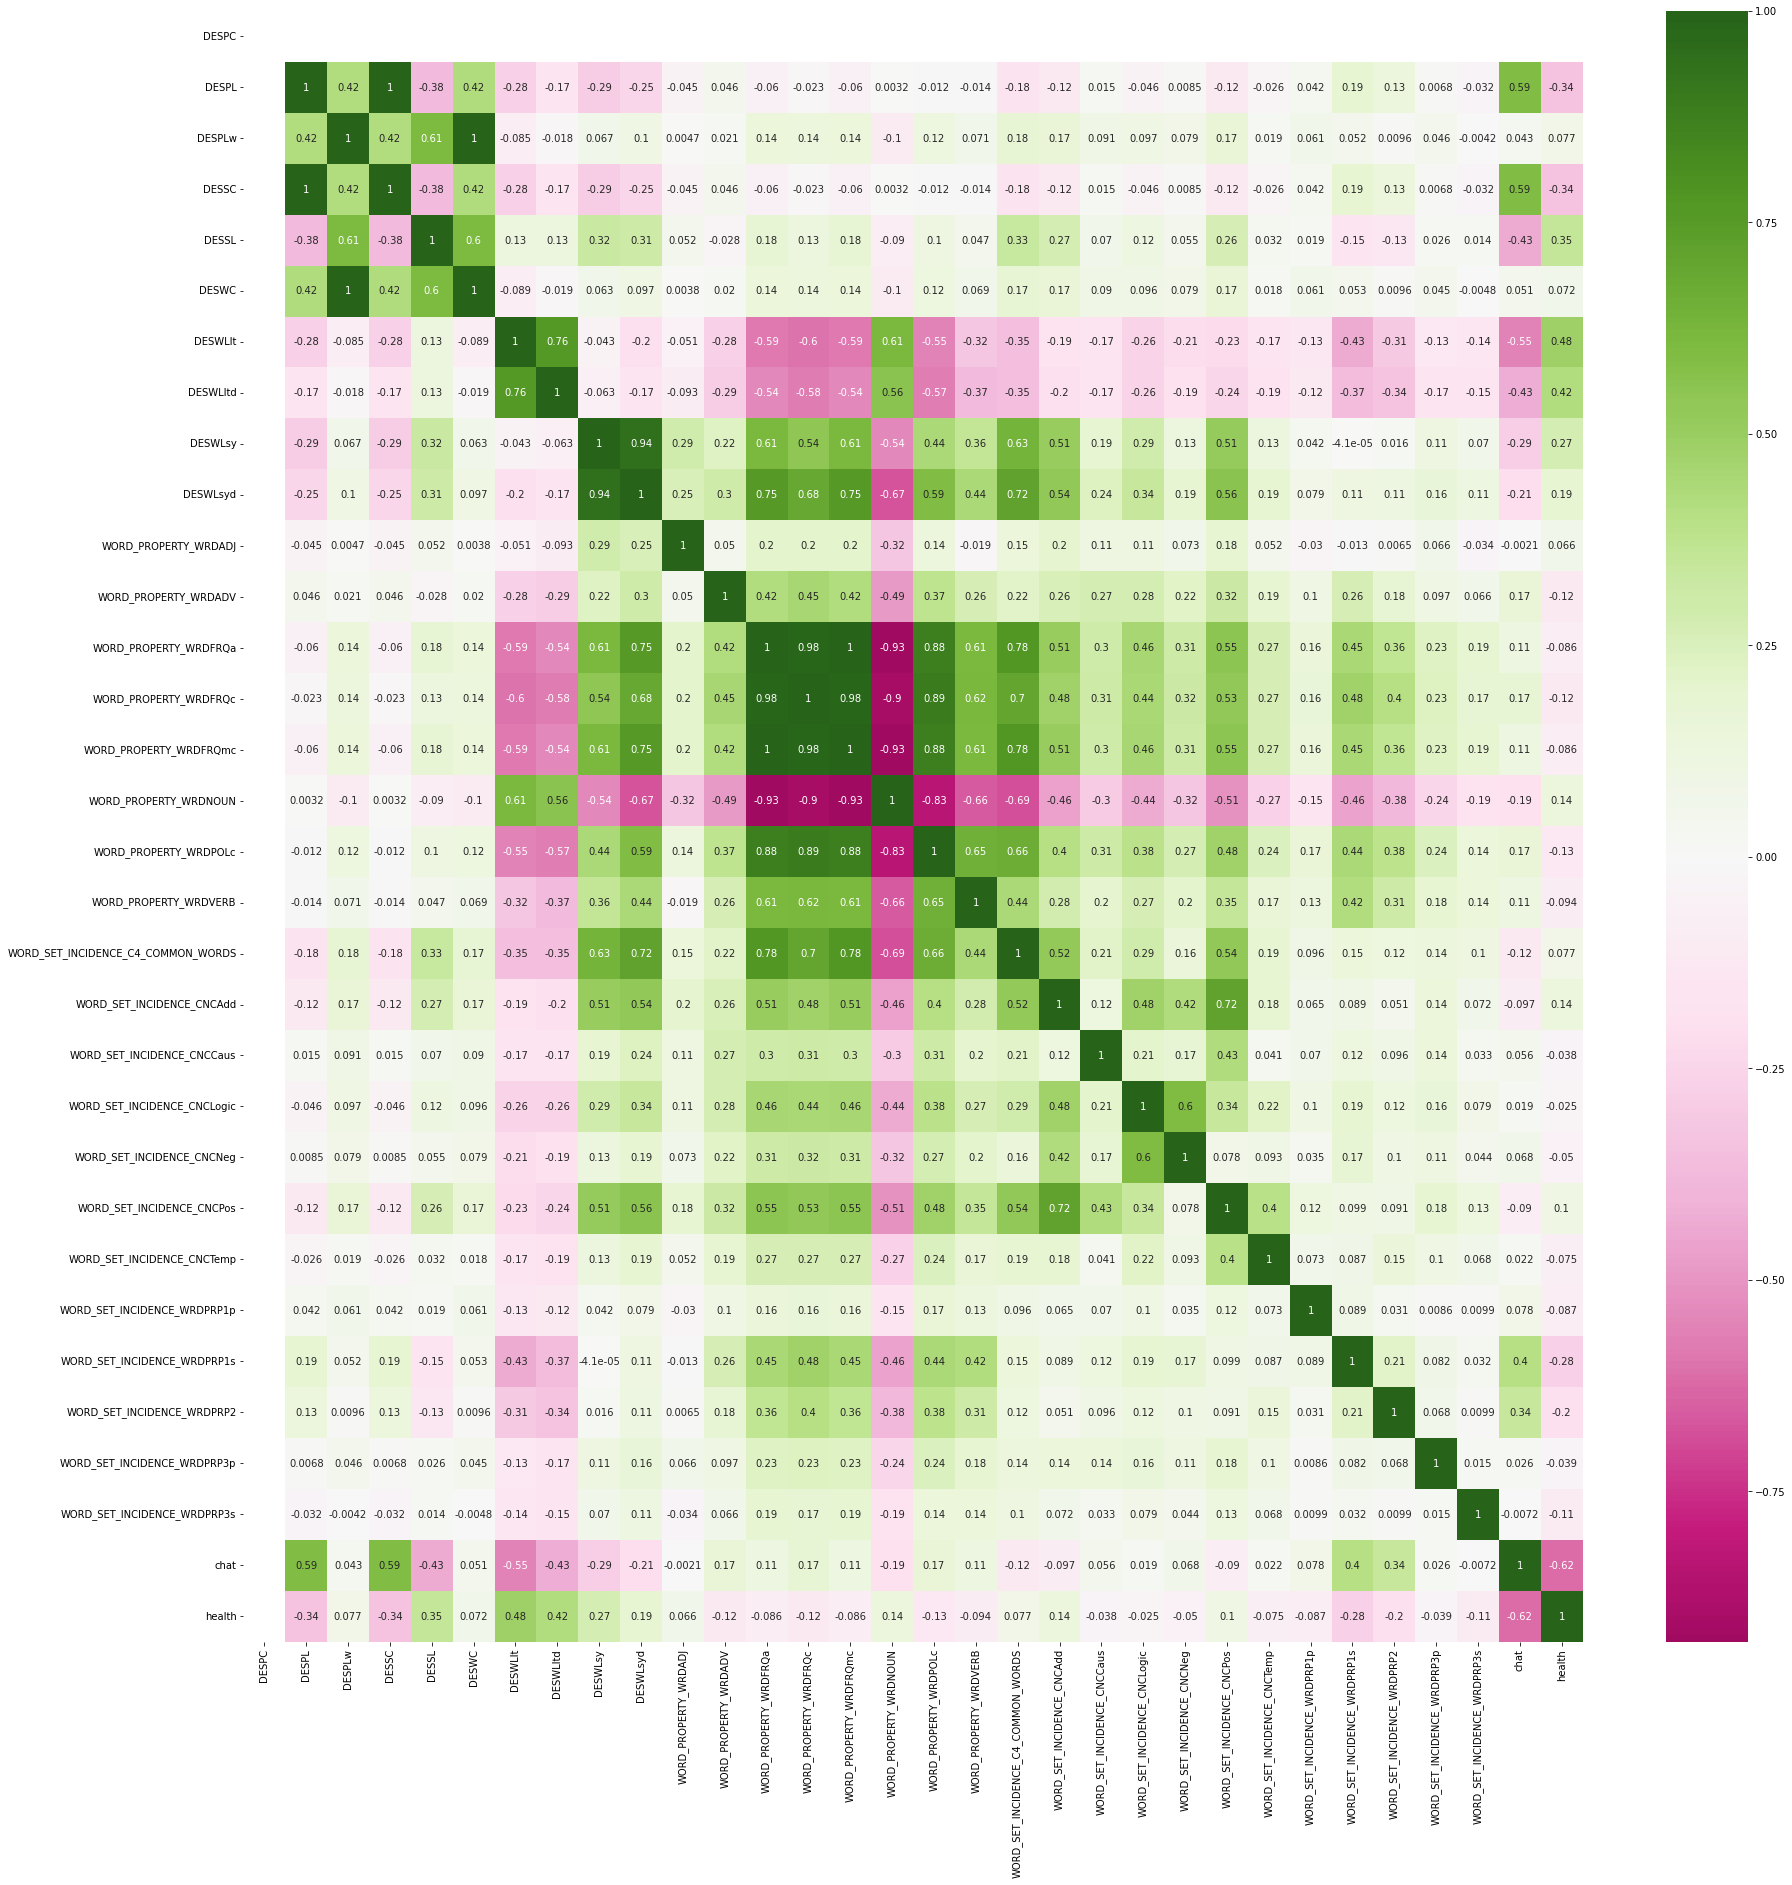

In [15]:
show_pairwise_metric_correlations(metrics_df)

## We found some 1-1 correlated metrics, so let's go ahead and drop those otherwise our analysis will be less clear

In [16]:
metrics_df = metrics_df.drop(["DESPL", "DESPLw"], axis=1) # we drop news because otherwise we have two intercepts


## Now let's pick which model we want to focus on (or if we want to compare the difference)

In [17]:
MODEL_SELECTION_OPTIONS = ["segmentation", "no_segmentation", "treatment_effect"]

SELECTED_MODEL = "treatment_effect"

if SELECTED_MODEL == "segmentation":
    outcomes_final_df = pd.DataFrame.from_dict(
        {"chrf++" : outcomes_df_fixed["score1"]}
    )
elif SELECTED_MODEL == "no_segmentation":
    outcomes_final_df = pd.DataFrame.from_dict(
        {"chrf++" : outcomes_df["score1"]}
    )
elif SELECTED_MODEL == "treatment_effect":
    outcomes_final_df = pd.DataFrame.from_dict(
        {"$\Delta$ chrf++" : outcomes_df_fixed["score1"] - outcomes_df["score1"]}
    )

outcomes_df_fixed.drop(["translation1", "translation2", "score2", "outcome"], axis=1)
metrics_test = metrics_df[metrics_df["text_key"] == 'sentence_eng_Latn']
predictive_analysis = PredictFromCharacteristicsAnalysis(
    metrics_test,
    outcomes_final_df,
    model_type="linear_regression"
)

Analysis initialized! There are:
 30 features available
 981 samples for fitting a predictive model
 328 to evaluate the fit.


## And now let's identify sources of heterogeneity

We've alreaedy pre-pruned the metrics where there was significant heterogeneity, but feel free to comment that out and see all the metrics!

/Users/phend/miniconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/stats/proportion.py:93: RuntimeWarning: invalid value encountered in sqrt
  std_ = np.sqrt(q_ * (1 - q_) / nobs)
/Users/phend/Documents/dc2/text_characterization/analysis.py:134: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


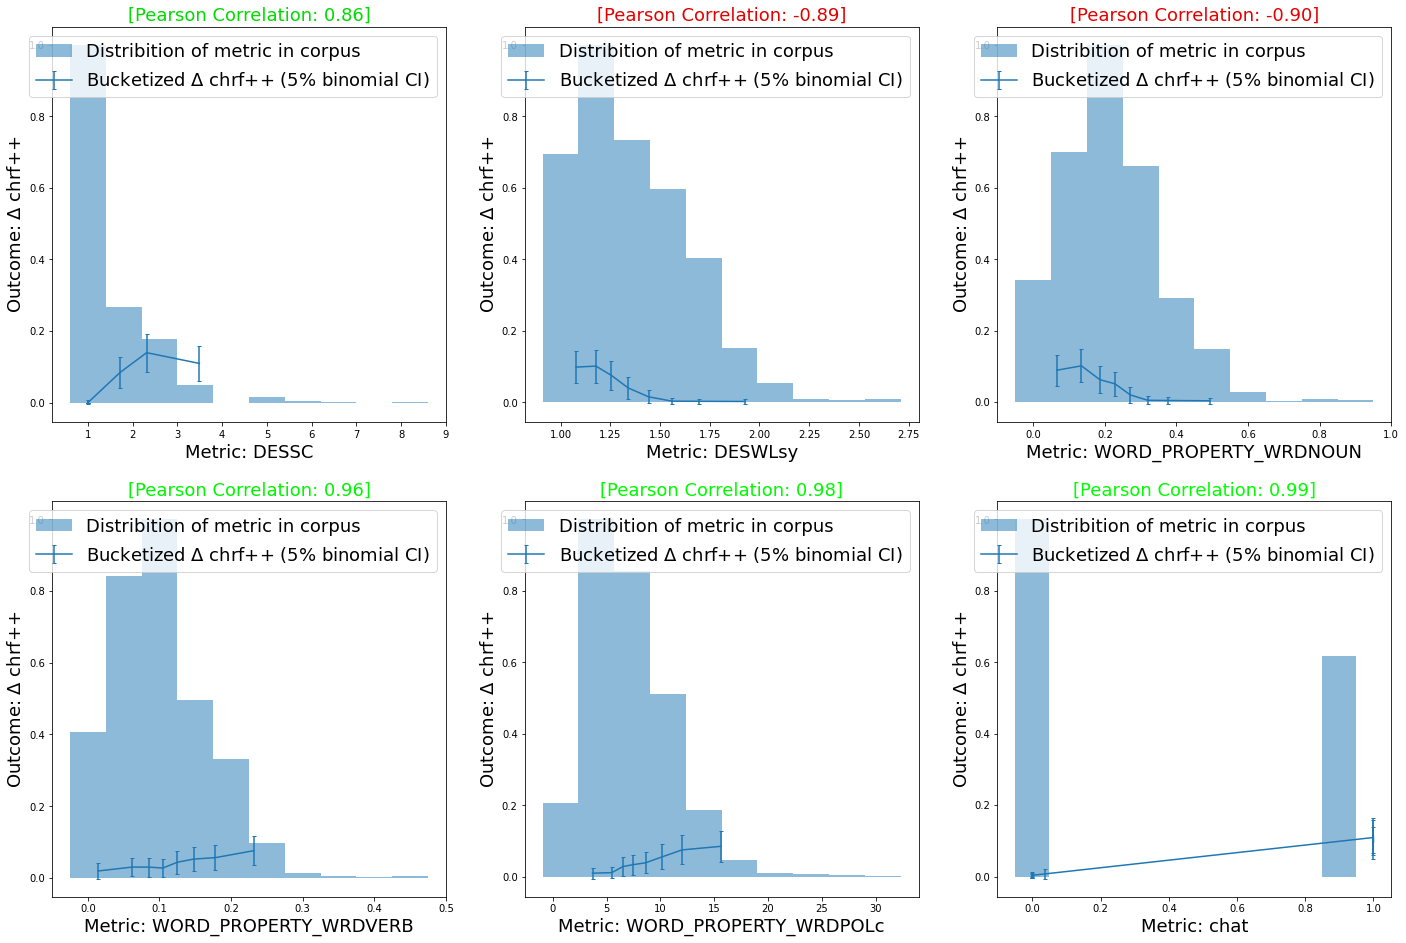

In [18]:
metrics=[('DESSC', 'sentence_eng_Latn'), ('DESWLsy', 'sentence_eng_Latn'), 
         ('WORD_PROPERTY_WRDNOUN', 'sentence_eng_Latn'), 
         ('WORD_PROPERTY_WRDVERB', 'sentence_eng_Latn'), 
         ('WORD_PROPERTY_WRDPOLc', 'sentence_eng_Latn'), 
         ('chat', 'sentence_eng_Latn')
        ]
import json

def parse_tuple(string):
    try:
        s = eval(string)
        if type(s) == tuple:
            return s
        return
    except:
        return
    
def metric_label_reformatter(metric_name):
    name = parse_tuple(metric_name)
    return name[0]


predictive_analysis.show_individual_metric_correlations(metrics=metrics, figsize=(8,8), fontsize=18, data_points_per_bucket=150, n_columns=3, metric_label_reformatter=metric_label_reformatter)


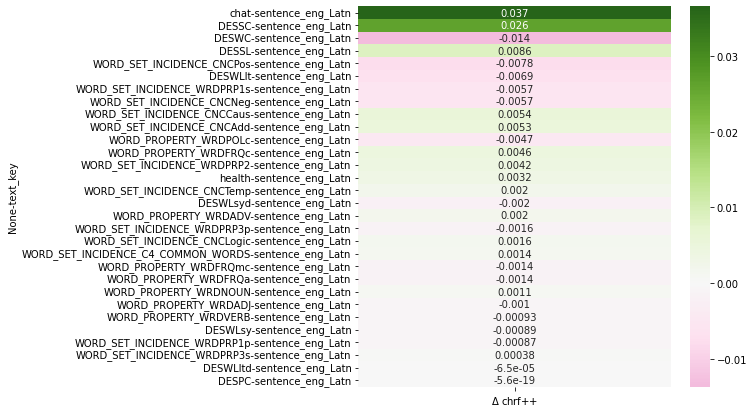

In [19]:

predictive_analysis.fit_predictive_models()
predictive_analysis.show_coefficients(num_rows=1000)

In [20]:
# Let's examine some samples
translations_not_fixed = outcomes_df["translation1"]
translations_fixed = outcomes_df_fixed["translation1"]
gt = data["sentence_rus_Cyrl"]
en = data["sentence_eng_Latn"]

for i, (eng, fixed, not_fixed, true) in enumerate(zip(en, translations_fixed, translations_not_fixed, gt)):
    print(f"En: {eng}\nTrue: {true}\nNLLB: {not_fixed['translation_text']}\nNLLB(segmented): {fixed}")
    if i==50:
        break

En: Ah that makes a ton of sense, they seem like similar jobs at least in some respects. Encouraging people and helping them meet their goals. You should totally try kayaking! It's super versatile, it can be relaxing on a lake or thrilling doing whitewater
True: Ну, тогда все вполне понятно, эти два занятия очень похожи, по крайней мере, в некоторых аспектах. Вдохновляй людей и помогай им достигать целей. Вы обязательно должны попробовать каякинг! Ощущения самые разные: можно расслабиться на озере или получить встряску в бурной воде.
NLLB: Это очень логично, они похожи на работу, по крайней мере в некоторых отношениях. поощрять людей и помогать им достичь своих целей. вы должны совершенно попробовать каякинг! это супер универсально, это может быть расслабляться на озере или захватывающее делать белую воду
NLLB(segmented): Это имеет смысл, они похожи на похожие работы по крайней мере в некоторых отношениях. Поощрять людей и помогать им достичь своих целей. Тебе стоит попробовать кататьс